In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Function to read images from a folder and label them based on folder name
def read_images_and_label(folder_path):
    image_data = []
    labels = []

    # Iterate through the folders in the specified path
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)

        # Check if the item in the directory is a folder
        if os.path.isdir(label_path):
            # Iterate through images in the folder
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)

                # Read the image using OpenCV
                img = cv2.imread(image_path)

                
                # Resize the image to a consistent size (e.g., 128x128)
                img = cv2.resize(img, (64, 64))

                # Normalize pixel values to the range [0, 1]
                img = img.astype('float32') / 64
                
                # Append the image data and corresponding label
                image_data.append(img)
                labels.append(label)

    return np.array(image_data), np.array(labels)

# Specify the path to the folder containing labeled subfolders of images
folder_path = "C:\\Users\\glowi\Desktop\\SYNC_internship\\Plant disease\\archive\\plantvillage dataset\\grayscale"

# Call the function to read images and labels
images, labels = read_images_and_label(folder_path)

# Now, 'images' contains the image data, and 'labels' contains the corresponding labels


In [2]:
images


array([[[[2.640625, 2.640625, 2.640625],
         [2.609375, 2.609375, 2.609375],
         [2.640625, 2.640625, 2.640625],
         ...,
         [2.953125, 2.953125, 2.953125],
         [2.953125, 2.953125, 2.953125],
         [2.921875, 2.921875, 2.921875]],

        [[2.6875  , 2.6875  , 2.6875  ],
         [2.703125, 2.703125, 2.703125],
         [2.671875, 2.671875, 2.671875],
         ...,
         [2.9375  , 2.9375  , 2.9375  ],
         [2.921875, 2.921875, 2.921875],
         [2.90625 , 2.90625 , 2.90625 ]],

        [[2.609375, 2.609375, 2.609375],
         [2.625   , 2.625   , 2.625   ],
         [2.671875, 2.671875, 2.671875],
         ...,
         [2.90625 , 2.90625 , 2.90625 ],
         [2.875   , 2.875   , 2.875   ],
         [2.828125, 2.828125, 2.828125]],

        ...,

        [[1.578125, 1.578125, 1.578125],
         [1.5625  , 1.5625  , 1.5625  ],
         [1.53125 , 1.53125 , 1.53125 ],
         ...,
         [1.78125 , 1.78125 , 1.78125 ],
         [1.84375 , 1.

In [3]:
labels

array(['Apple___Apple_scab', 'Apple___Apple_scab', 'Apple___Apple_scab',
       ..., 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Tomato___Tomato_Yellow_Leaf_Curl_Virus'], dtype='<U50')

In [4]:
num_images, img_size = images.shape[0], np.prod(images.shape[1:])
images_2d = images.reshape((num_images, img_size))


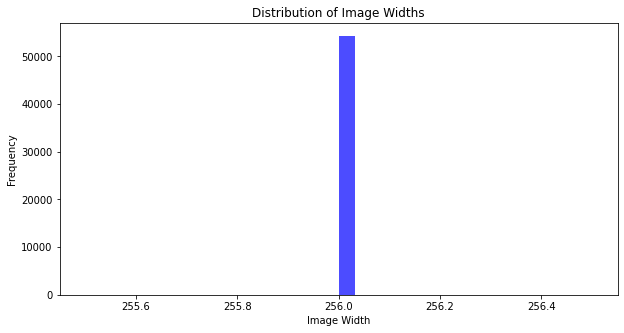

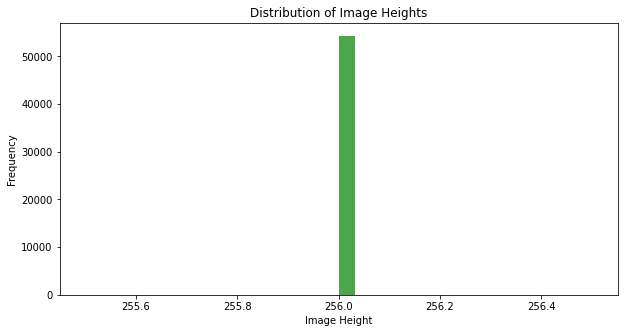

Average Image Width: 256.0 pixels
Average Image Height: 256.0 pixels


In [5]:

# Function to calculate and plot the distribution of image sizes
def plot_image_size_distribution(folder_path):
    # Lists to store image widths and heights
    image_widths = []
    image_heights = []

    # Iterate through the folders in the specified path
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)

        # Check if the item in the directory is a folder
        if os.path.isdir(label_path):
            # Iterate through images in the folder
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)

                # Read the image using OpenCV
                img = cv2.imread(image_path)

                # Get image dimensions
                height, width, _ = img.shape

                # Append image dimensions to the lists
                image_widths.append(width)
                image_heights.append(height)

    # Plot the distribution of image widths
    plt.figure(figsize=(10, 5))
    plt.hist(image_widths, bins=30, color='blue', alpha=0.7)
    plt.title('Distribution of Image Widths')
    plt.xlabel('Image Width')
    plt.ylabel('Frequency')
    plt.show()

    # Plot the distribution of image heights
    plt.figure(figsize=(10, 5))
    plt.hist(image_heights, bins=30, color='green', alpha=0.7)
    plt.title('Distribution of Image Heights')
    plt.xlabel('Image Height')
    plt.ylabel('Frequency')
    plt.show()

    # Display summary statistics
    print(f"Average Image Width: {np.mean(image_widths)} pixels")
    print(f"Average Image Height: {np.mean(image_heights)} pixels")

# Call the function to plot the image size distribution
plot_image_size_distribution(folder_path)

In [6]:
data = pd.DataFrame(images_2d)
data['label'] = labels
data

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,label
0,2.640625,2.640625,2.640625,2.609375,2.609375,2.609375,2.640625,2.640625,2.640625,2.671875,...,1.750000,1.750000,1.750000,1.750000,1.750000,1.750000,1.796875,1.796875,1.796875,Apple___Apple_scab
1,2.046875,2.046875,2.046875,2.031250,2.031250,2.031250,2.062500,2.062500,2.062500,2.031250,...,1.296875,1.296875,1.296875,1.296875,1.296875,1.296875,1.343750,1.343750,1.343750,Apple___Apple_scab
2,2.125000,2.125000,2.125000,2.093750,2.093750,2.093750,2.109375,2.109375,2.109375,2.109375,...,1.765625,1.765625,1.765625,1.765625,1.765625,1.765625,1.703125,1.703125,1.703125,Apple___Apple_scab
3,3.265625,3.265625,3.265625,3.234375,3.234375,3.234375,3.093750,3.093750,3.093750,2.953125,...,2.812500,2.812500,2.812500,2.781250,2.781250,2.781250,2.812500,2.812500,2.812500,Apple___Apple_scab
4,2.328125,2.328125,2.328125,2.390625,2.390625,2.390625,2.375000,2.375000,2.375000,2.328125,...,1.421875,1.421875,1.421875,1.390625,1.390625,1.390625,1.375000,1.375000,1.375000,Apple___Apple_scab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54300,2.875000,2.875000,2.875000,2.687500,2.687500,2.687500,2.640625,2.640625,2.640625,2.562500,...,2.234375,2.234375,2.234375,2.125000,2.125000,2.125000,2.171875,2.171875,2.171875,Tomato___Tomato_Yellow_Leaf_Curl_Virus
54301,1.750000,1.750000,1.750000,1.625000,1.625000,1.625000,1.562500,1.562500,1.562500,1.718750,...,2.296875,2.296875,2.296875,2.296875,2.296875,2.296875,2.312500,2.312500,2.312500,Tomato___Tomato_Yellow_Leaf_Curl_Virus
54302,1.687500,1.687500,1.687500,1.687500,1.687500,1.687500,1.687500,1.687500,1.687500,1.515625,...,1.296875,1.296875,1.296875,1.281250,1.281250,1.281250,1.281250,1.281250,1.281250,Tomato___Tomato_Yellow_Leaf_Curl_Virus
54303,1.578125,1.578125,1.578125,1.609375,1.609375,1.609375,1.562500,1.562500,1.562500,1.750000,...,2.546875,2.546875,2.546875,2.515625,2.515625,2.515625,2.546875,2.546875,2.546875,Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [7]:

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [8]:

X_train, X_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.3, random_state=42, shuffle = True)


In [9]:
# Define a learning rate scheduler
def lr_schedule(epoch):
    initial_lr = 0.0001
    drop = 0.5
    epochs_drop = 5
    lr = initial_lr * (drop ** (epoch // epochs_drop))
    return lr

# Create a learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

In [10]:
# Create a CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.BatchNormalization(),  
    
    layers.Dropout(0.2),
    
    layers.Flatten(),
    
    layers.Dropout(0.2),
    
    layers.Dense(128, activation='relu'),
    
    layers.Dense(64, activation='relu'),
    
    layers.Dense(32, activation='relu'),
    
    layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer with softmax for classification
])

# Specify the optimizer with gradient clipping
optimizer = Adam(clipvalue=0.5)

# Compile the model
model.compile(optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
Train_History=model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=[lr_scheduler])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

#Saving the model
model.save('CNN_grayscale_PlantDisease_64.h5')

Epoch 1/30
1188/1188 [==============================] - 73s 61ms/step - loss: 2.4894 - accuracy: 0.3576 - val_loss: 2.0642 - val_accuracy: 0.4371 - lr: 1.0000e-04
Epoch 2/30
1188/1188 [==============================] - 72s 61ms/step - loss: 1.5025 - accuracy: 0.5733 - val_loss: 1.7757 - val_accuracy: 0.5059 - lr: 1.0000e-04
Epoch 3/30
1188/1188 [==============================] - 71s 60ms/step - loss: 1.1359 - accuracy: 0.6617 - val_loss: 1.1636 - val_accuracy: 0.6585 - lr: 1.0000e-04
Epoch 4/30
1188/1188 [==============================] - 71s 60ms/step - loss: 0.9262 - accuracy: 0.7184 - val_loss: 1.0337 - val_accuracy: 0.6814 - lr: 1.0000e-04
Epoch 5/30
1188/1188 [==============================] - 70s 59ms/step - loss: 0.7793 - accuracy: 0.7608 - val_loss: 1.0655 - val_accuracy: 0.6871 - lr: 1.0000e-04
Epoch 6/30
1188/1188 [==============================] - 70s 59ms/step - loss: 0.6461 - accuracy: 0.7987 - val_loss: 0.7625 - val_accuracy: 0.7618 - lr: 5.0000e-05
Epoch 7/30
1188/1188 [